<a href="https://colab.research.google.com/github/vermaayush680/Trust-Link/blob/main/TransUnion_EDA_and_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The Missing Data has been filled and in this notebook, Data PreProcessing has been done before
In this notebook,Exploratory Data Analysis and Modelling has been done!!

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,roc_auc_score,roc_curve

# Loading Dataset

In [2]:
df = pd.read_csv('/content/train_final.csv')

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0,0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,1,1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,...,Good,809.98,31.944960,22 Years and 3 Months,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,2,2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,3,3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,4,4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [4]:
df.shape

(100000, 30)

In [5]:
df.isnull().sum().sum()

0

In [6]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ID', 'Customer_ID', 'Month', 'Name',
       'Age', 'SSN', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                100000 non-null  int64  
 1   Unnamed: 0.1              100000 non-null  int64  
 2   ID                        100000 non-null  object 
 3   Customer_ID               100000 non-null  object 
 4   Month                     100000 non-null  object 
 5   Name                      100000 non-null  object 
 6   Age                       100000 non-null  int64  
 7   SSN                       100000 non-null  object 
 8   Occupation                100000 non-null  object 
 9   Annual_Income             100000 non-null  float64
 10  Monthly_Inhand_Salary     100000 non-null  float64
 11  Num_Bank_Accounts         100000 non-null  int64  
 12  Num_Credit_Card           100000 non-null  int64  
 13  Interest_Rate             100000 non-null  in

In [8]:
df_new = df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'ID', 'Customer_ID', 'Month', 'Name','SSN', 
         'Occupation', 'Type_of_Loan','Credit_Mix','Credit_History_Age','Payment_of_Min_Amount','Payment_Behaviour'],axis=1)

In [9]:
df_new['Credit_Score'] = df_new['Credit_Score'].replace({'Good':1,'Standard':0,'Poor':-1})

Using Integer Coding to Map Credit Score

# Exploratory Data Analysis

### Correlation Heatmap

In [10]:
df_new.corr()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
Age,1.000000,0.006412,0.089836,-0.189223,-0.148214,-0.216945,-0.212859,-0.173679,0.001424,-0.155479,-0.249840,-0.202030,0.025247,0.001414,0.058084,0.116603,0.160488
Annual_Income,0.006412,1.000000,0.030079,-0.009146,-0.001948,-0.006698,-0.005259,-0.010631,0.001257,0.000749,-0.009850,-0.003706,0.010316,-0.000248,0.020058,0.020028,0.008015
Monthly_Inhand_Salary,0.089836,0.030079,1.000000,-0.281820,-0.216093,-0.299524,-0.252929,-0.248947,0.000594,-0.172901,-0.277235,-0.266939,0.174559,0.007517,0.631594,0.700632,0.207504
Num_Bank_Accounts,-0.189223,-0.009146,-0.281820,1.000000,0.442559,0.584053,0.471236,0.560350,0.010455,0.330093,0.517480,0.506858,-0.071535,-0.006397,-0.184164,-0.300374,-0.388353
Num_Credit_Card,-0.148214,-0.001948,-0.216093,0.442559,1.000000,0.497696,0.416956,0.479367,0.010193,0.252346,0.458817,0.490328,-0.055282,-0.006742,-0.144429,-0.238873,-0.404291
Interest_Rate,-0.216945,-0.006698,-0.299524,0.584053,0.497696,1.000000,0.558100,0.589051,0.012094,0.365721,0.631282,0.629394,-0.075705,-0.005084,-0.197122,-0.329262,-0.485399
Num_of_Loan,-0.212859,-0.005259,-0.252929,0.471236,0.416956,0.558100,1.000000,0.500096,0.009629,0.368029,0.563031,0.637127,-0.100650,-0.001206,-0.166218,-0.434226,-0.357860
Delay_from_due_date,-0.173679,-0.010631,-0.248947,0.560350,0.479367,0.589051,0.500096,1.000000,0.011980,0.292725,0.539002,0.571713,-0.063796,-0.003889,-0.164307,-0.282181,-0.431591
Num_of_Delayed_Payment,0.001424,0.001257,0.000594,0.010455,0.010193,0.012094,0.009629,0.011980,1.000000,0.007315,0.004645,0.009329,0.001643,0.000510,-0.000192,-0.002634,-0.007953
Changed_Credit_Limit,-0.155479,0.000749,-0.172901,0.330093,0.252346,0.365721,0.368029,0.292725,0.007315,1.000000,0.377596,0.457291,-0.047962,-0.002150,-0.115973,-0.204759,-0.168862


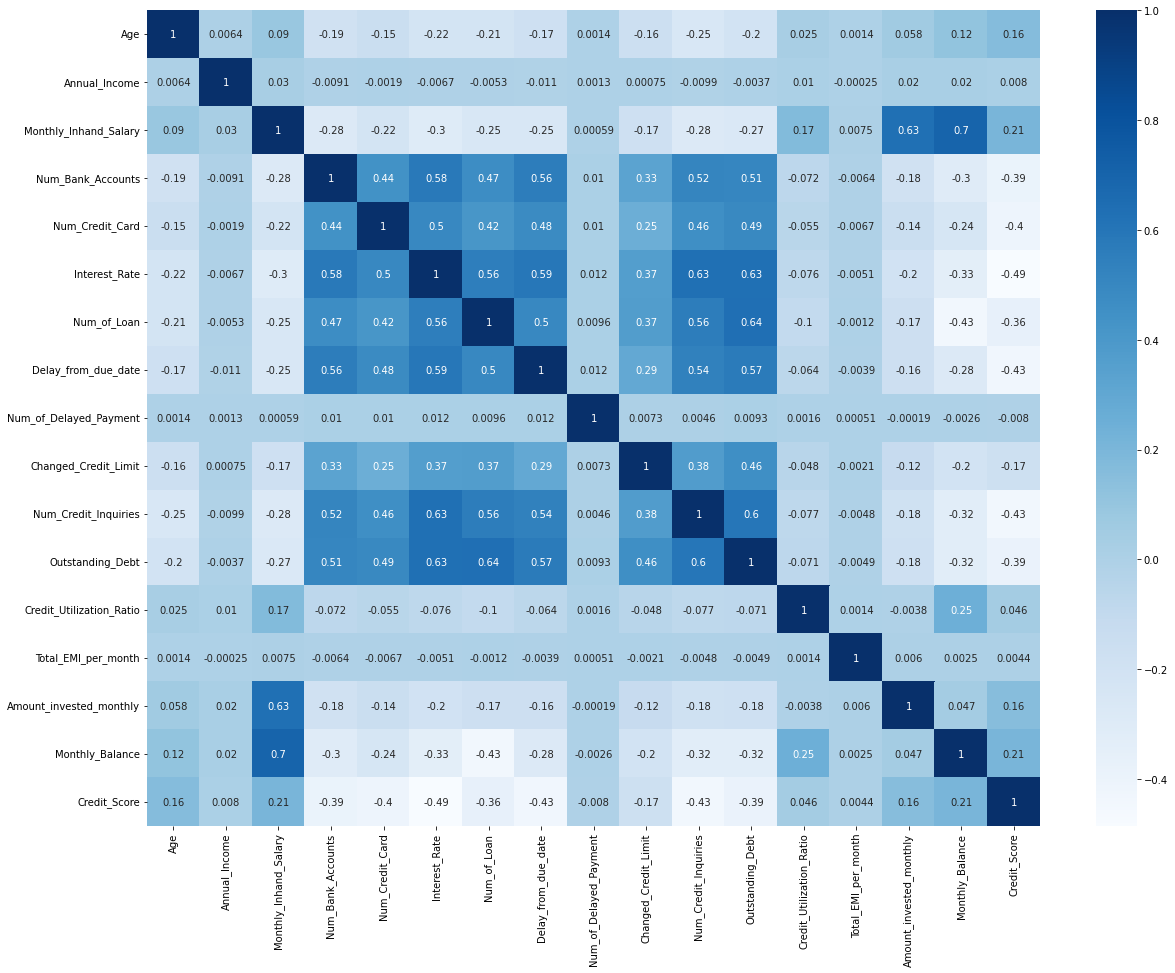

In [11]:
plt.figure(figsize=(20,15));
sns.heatmap(df_new.corr(),cmap='Blues',annot=True);

### Plotting some strong relations from the Correlation Matrix

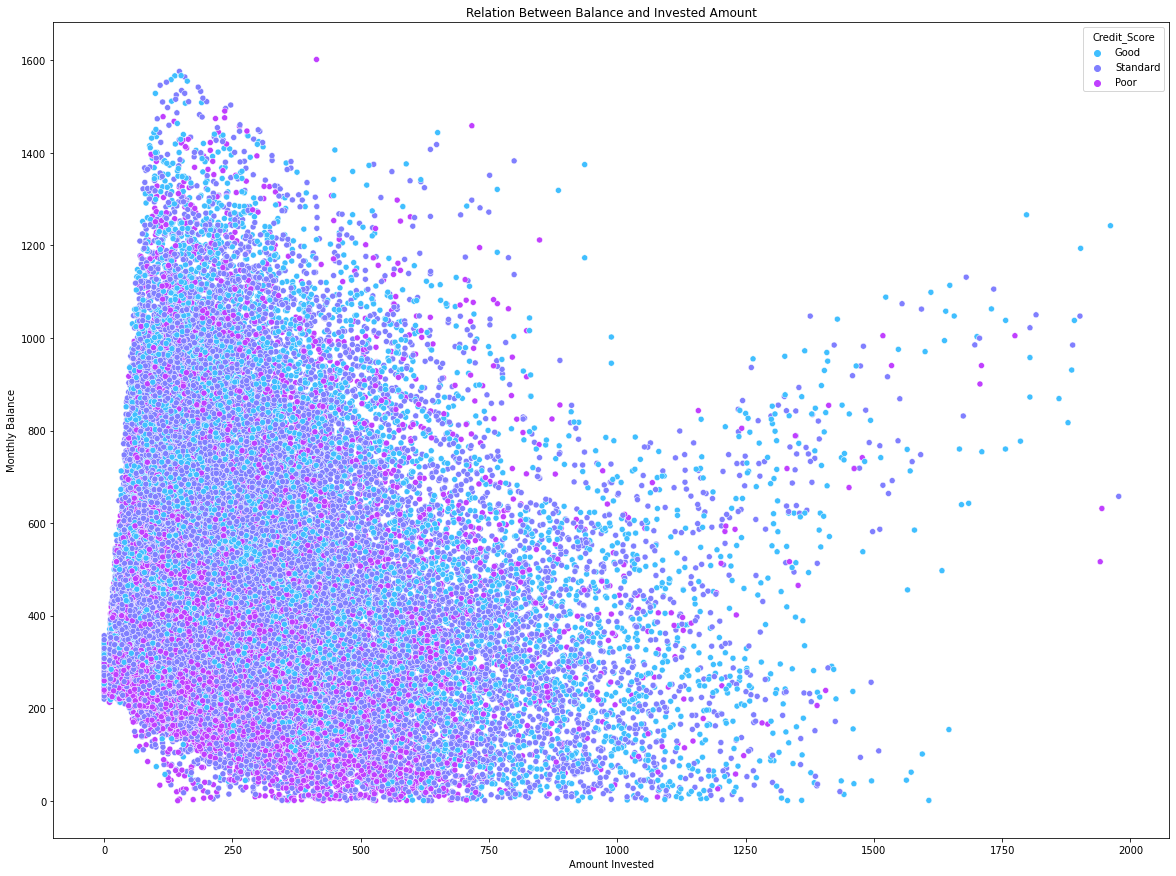

In [12]:
plt.figure(figsize=(20,15));
sns.scatterplot(x='Amount_invested_monthly',y='Monthly_Balance',data=df,palette='cool',hue='Credit_Score');
plt.xlabel("Amount Invested")
plt.ylabel("Monthly Balance")
plt.title("Relation Between Balance and Invested Amount")
plt.show()

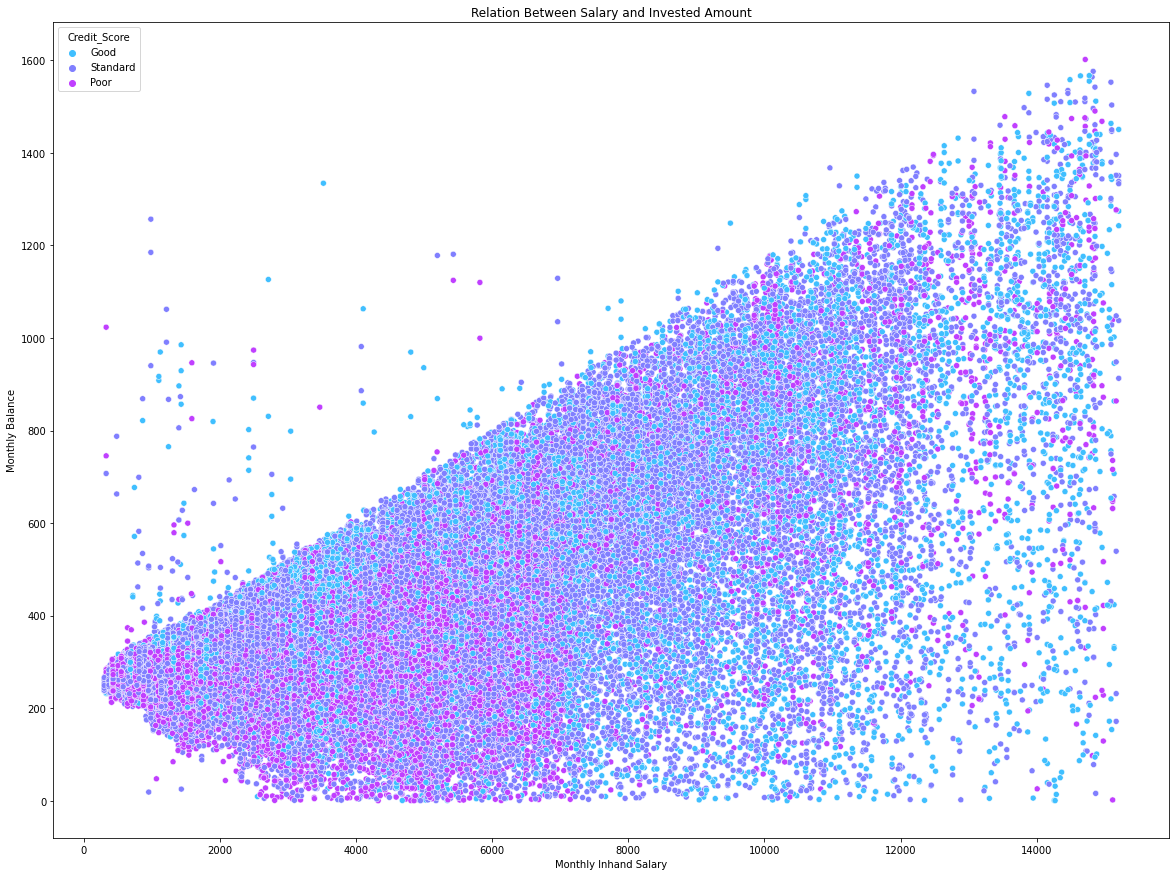

In [13]:
plt.figure(figsize=(20,15));
sns.scatterplot(x='Monthly_Inhand_Salary',y='Monthly_Balance',data=df,palette='cool',hue='Credit_Score');
plt.xlabel("Monthly Inhand Salary")
plt.ylabel("Monthly Balance")
plt.title("Relation Between Salary and Invested Amount")
plt.show()

### Histogram Plot to see distributions

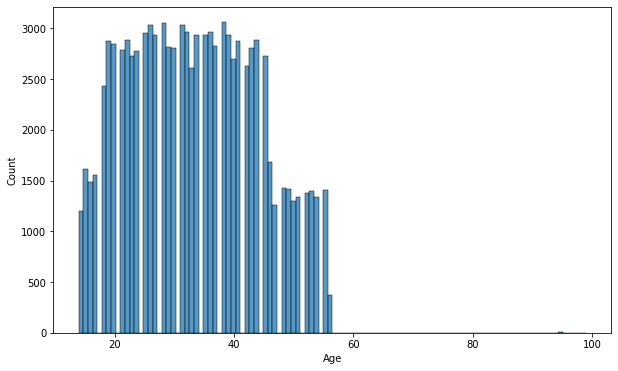

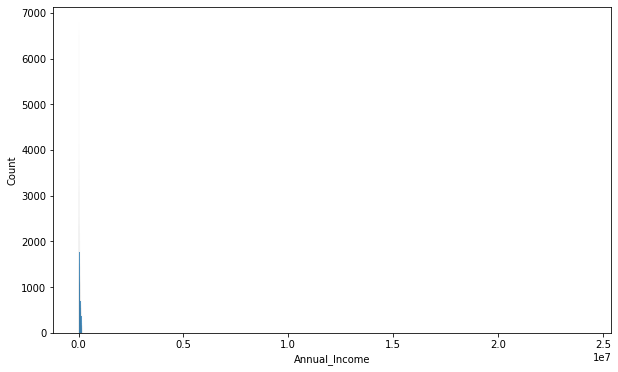

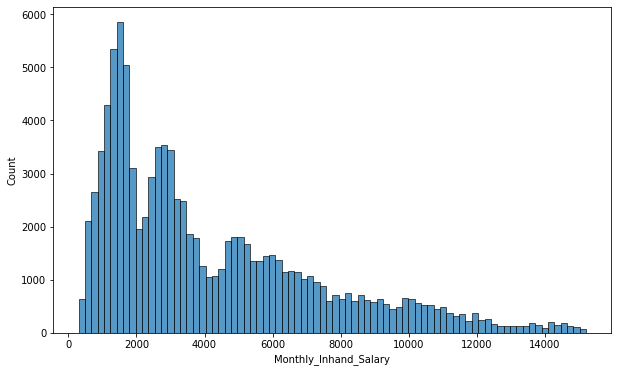

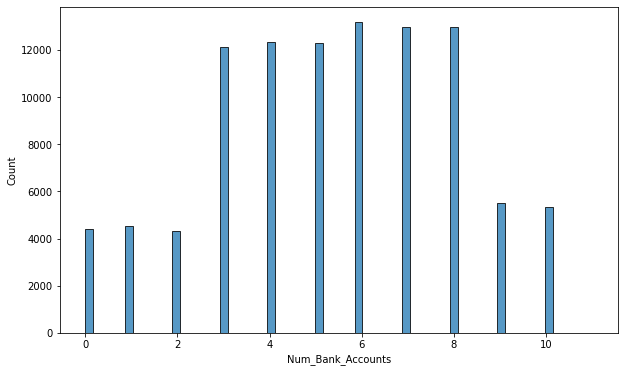

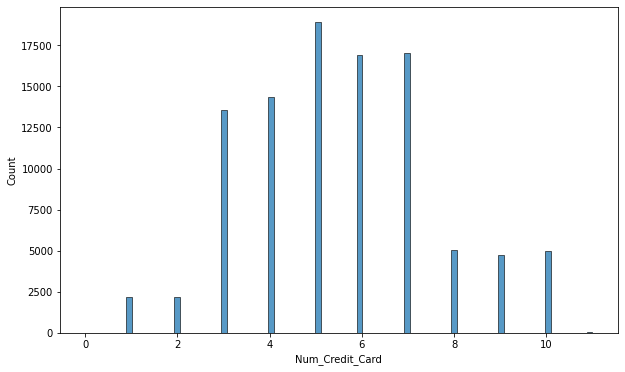

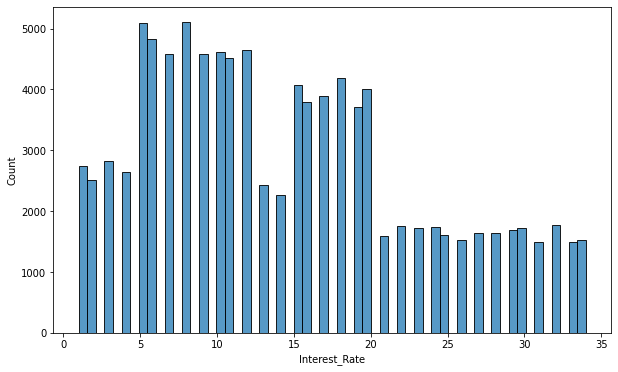

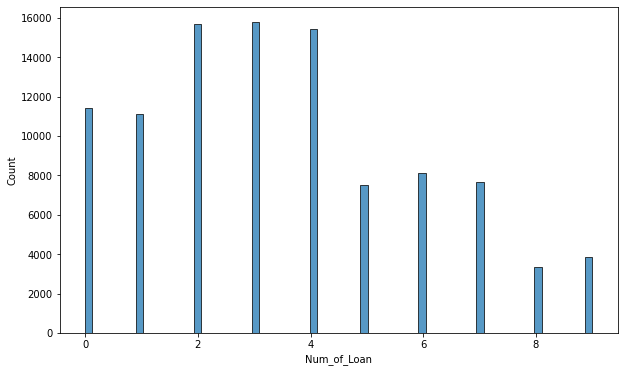

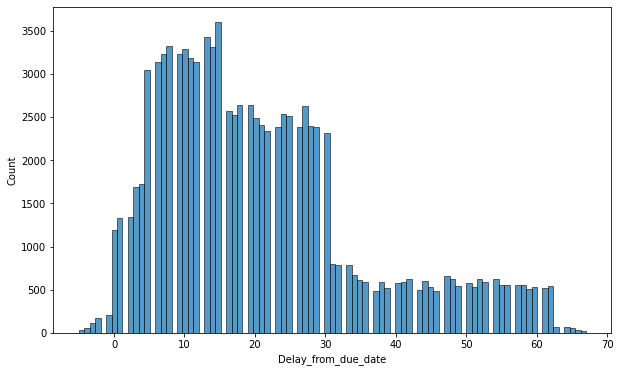

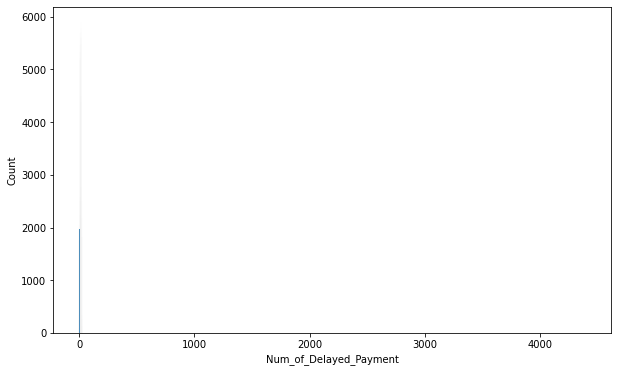

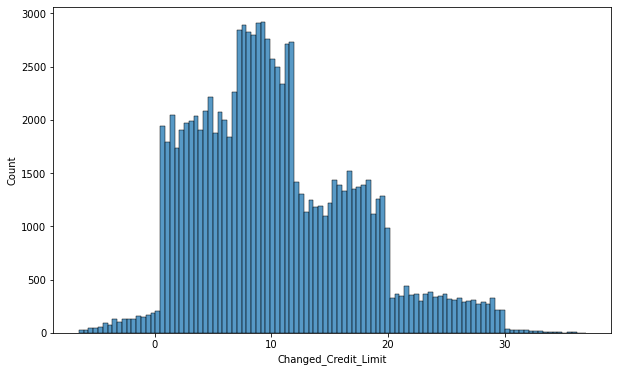

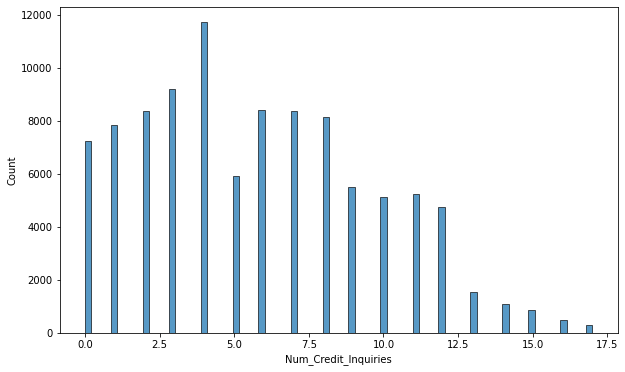

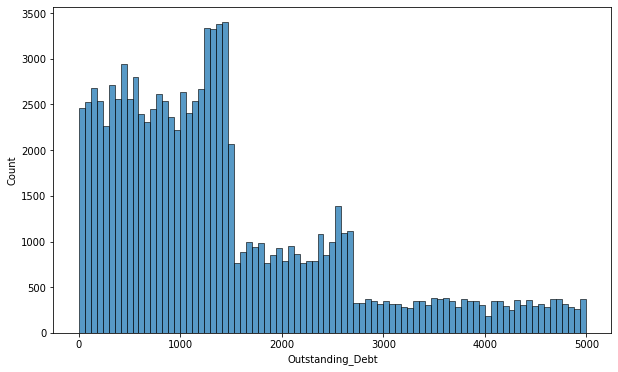

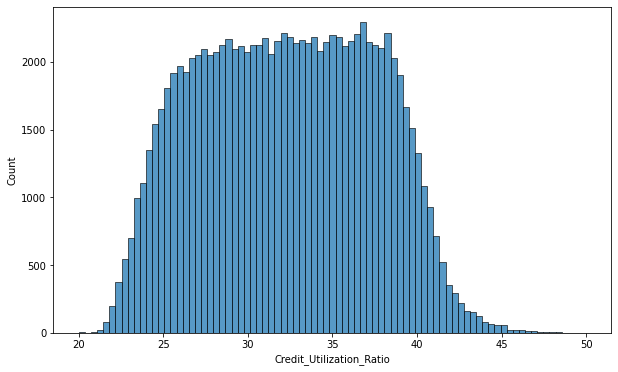

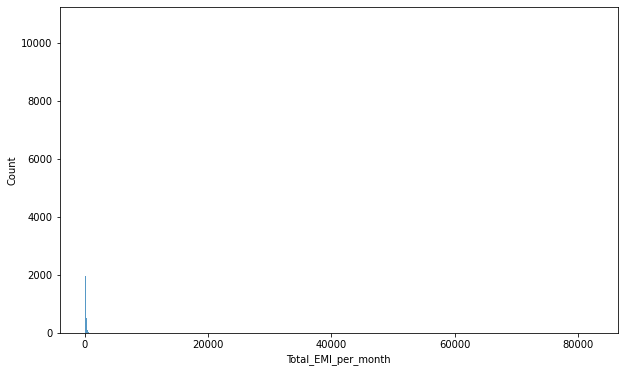

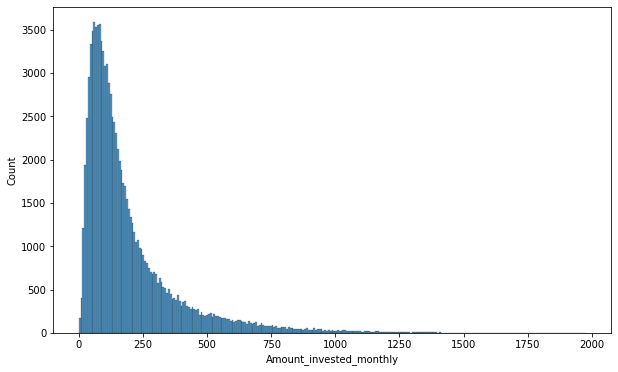

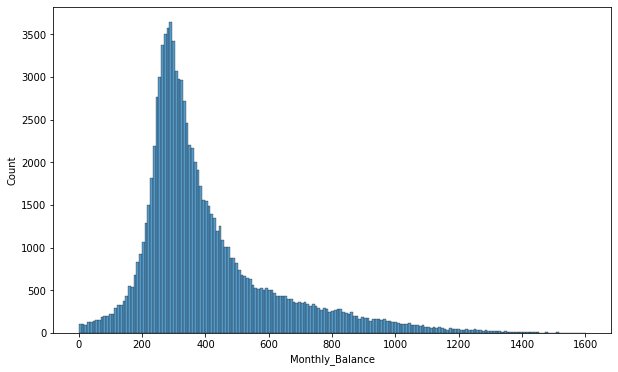

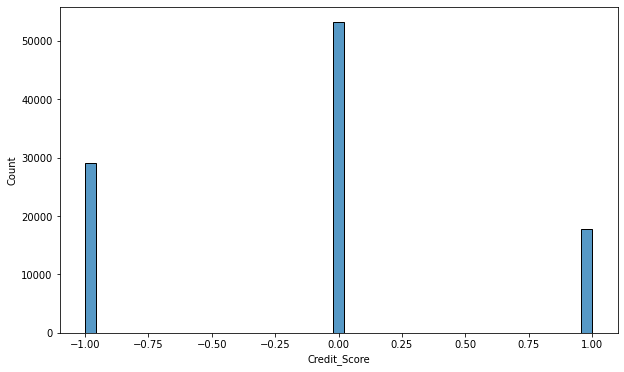

In [14]:
for col in df_new.columns:
  plt.figure(figsize=(10,6));
  sns.histplot(data=df_new[col]);
  plt.show();

Amount_Invested_Monthly and Monthly Balance are highly left skewed.

Also cound of Standard Credit Score is way more than Good and Poor. So we will be using ROC Metric for evaluation of our model which is also in line with the evaluation metric used for evaluation of test data as given in the competition description.

### BoxPlot to find Outliers

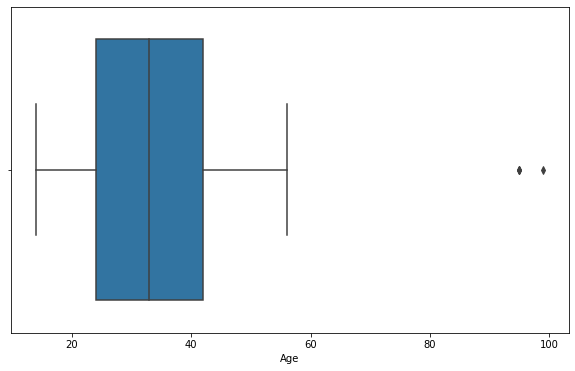

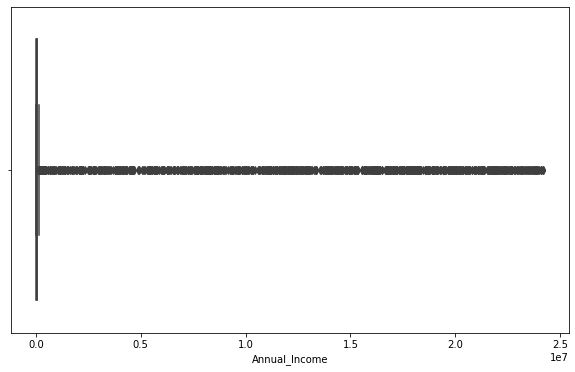

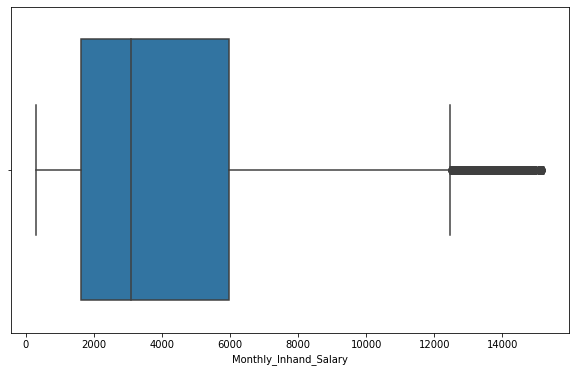

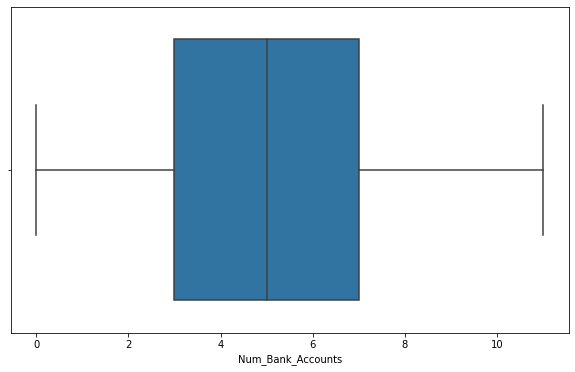

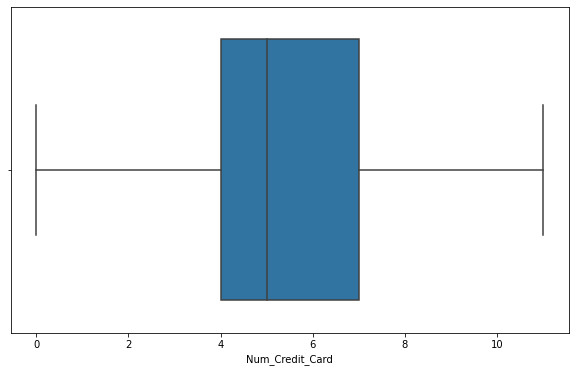

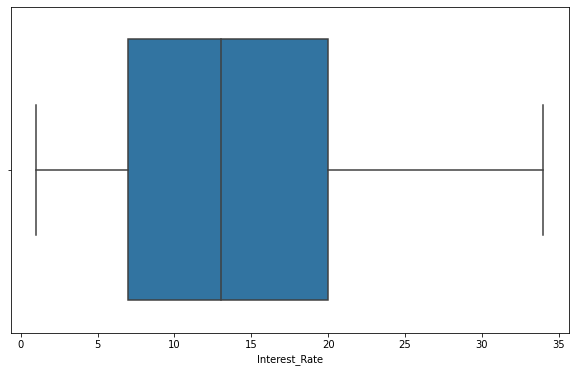

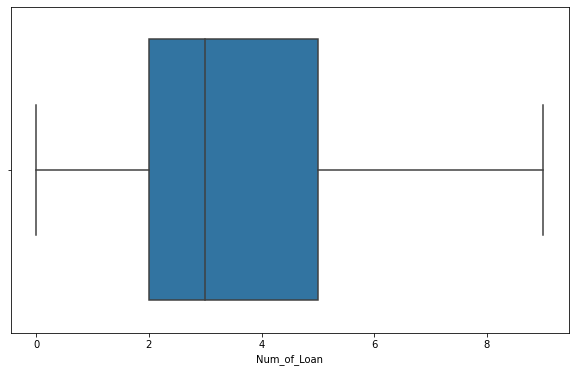

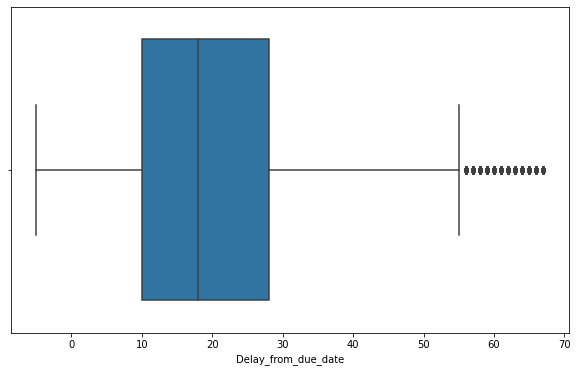

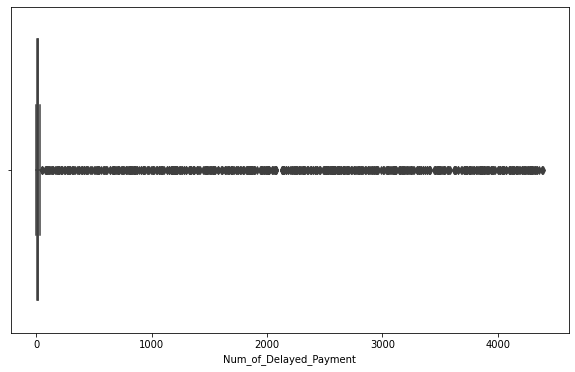

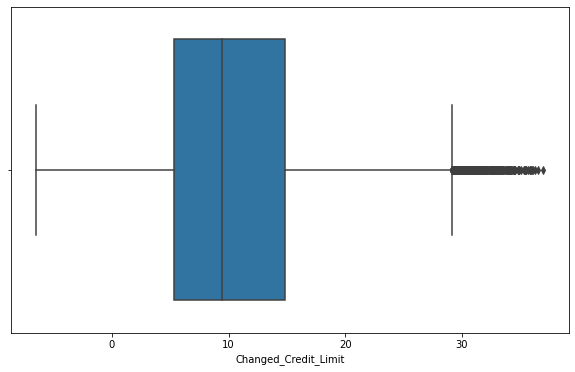

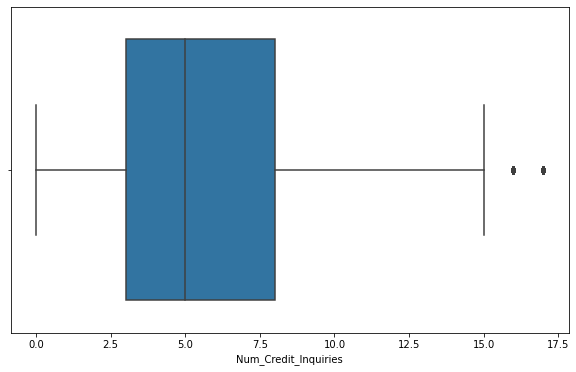

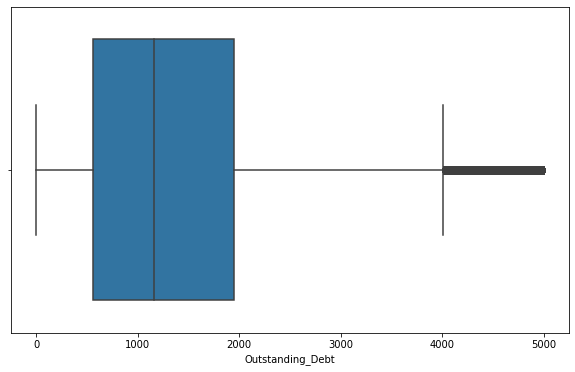

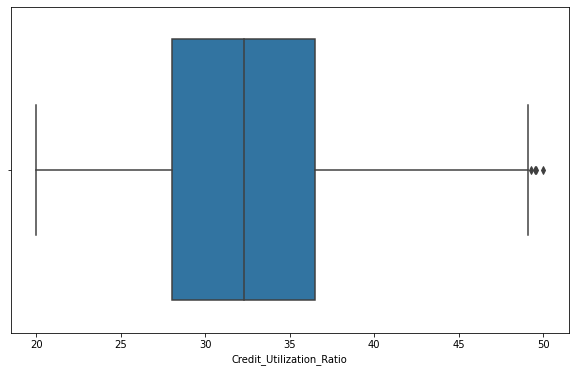

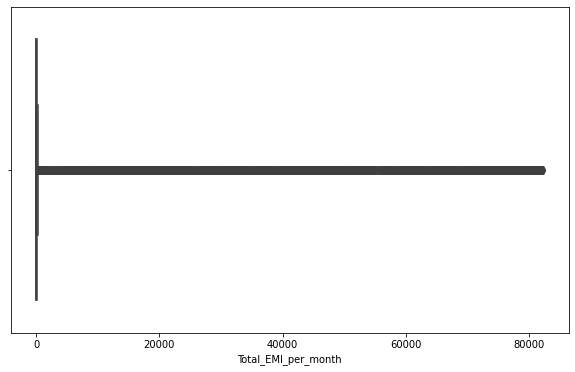

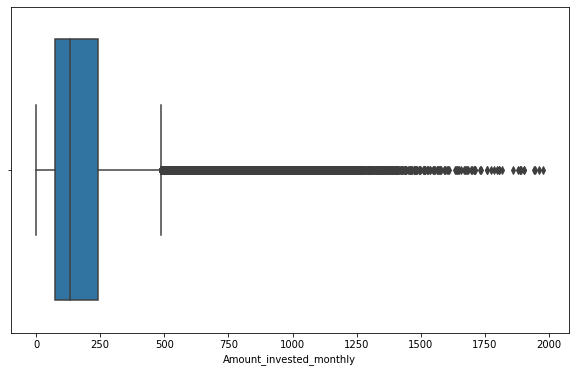

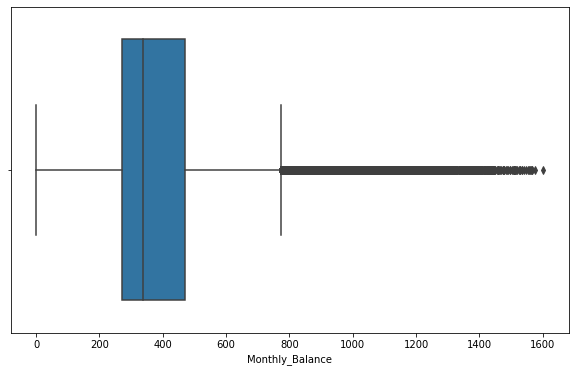

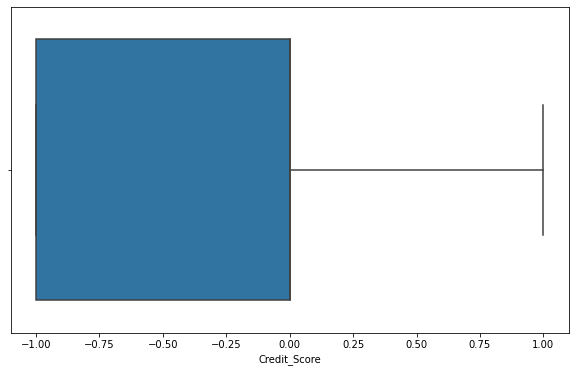

In [15]:
for col in df_new.columns:
  plt.figure(figsize=(10,6));
  sns.boxplot(x = df_new[col]);
  plt.show();
  print("\n\n\n")

# Modelling

Adding a random feature for feature selection

In [16]:
df_new['Random_Col'] = np.random.random(df.shape[0])

In [17]:
df_new.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Random_Col
0,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,4.0,809.98,26.822620,49.574949,80.415295,312.494089,1,0.168696
1,23,19114.12,1824.843333,3,4,3,4,-1,7,11.27,4.0,809.98,31.944960,49.574949,118.280222,284.629162,1,0.839291
2,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,4.0,809.98,28.609352,49.574949,81.699521,331.209863,1,0.339260
3,23,19114.12,1824.843333,3,4,3,4,5,4,6.27,4.0,809.98,31.377862,49.574949,199.458074,223.451310,1,0.028291
4,23,19114.12,1824.843333,3,4,3,4,6,4,11.27,4.0,809.98,24.797347,49.574949,41.420153,341.489231,1,0.959179


In [18]:
X = df_new.drop(['Credit_Score'],axis=1)
y=df_new['Credit_Score']

## Test Train Split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)

## Normalization and Scaling

In [20]:
scaler = preprocessing.StandardScaler()

In [21]:
normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)

## Modelling

In [22]:
DR = DecisionTreeClassifier(random_state=42)

In [23]:
DR.fit(normalized_x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [24]:
normalized_x_test = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns)

## Prediction

In [25]:
predicted = DR.predict(normalized_x_test)

In [26]:
predicted_proba = DR.predict_proba(normalized_x_test)

In [27]:
actual = y_test

In [28]:
f1_score(actual,predicted,average='macro')

0.6751307368983163

In [29]:
roc_auc_score(actual, predicted_proba, average='weighted',multi_class='ovr')

0.7399685832790579

# Test Data Prediction

In [30]:
test_df = pd.read_csv('/content/test.csv')

In [31]:
test_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


## Cleaning and PreProcessing Test Data

In [32]:
test_df.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        5015
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour              0
Monthly_Balance              562
dtype: int64

In [33]:
test_df = test_df[X_train.columns.drop(['Random_Col'])]

Filtering only the columns used for training the model

In [34]:
test_df.isnull().sum()

Age                            0
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Monthly_Balance              562
dtype: int64

In [35]:
test_df = test_df.ffill()

In [36]:
cleanfunc = lambda a: str(a)[:-1] if str(a)[-1] == '_' else a

In [37]:
cleanfunc("24_")

'24'

In [38]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       50000 non-null  object 
 1   Annual_Income             50000 non-null  object 
 2   Monthly_Inhand_Salary     50000 non-null  float64
 3   Num_Bank_Accounts         50000 non-null  int64  
 4   Num_Credit_Card           50000 non-null  int64  
 5   Interest_Rate             50000 non-null  int64  
 6   Num_of_Loan               50000 non-null  object 
 7   Delay_from_due_date       50000 non-null  int64  
 8   Num_of_Delayed_Payment    50000 non-null  object 
 9   Changed_Credit_Limit      50000 non-null  object 
 10  Num_Credit_Inquiries      50000 non-null  float64
 11  Outstanding_Debt          50000 non-null  object 
 12  Credit_Utilization_Ratio  50000 non-null  float64
 13  Total_EMI_per_month       50000 non-null  float64
 14  Amount

## Converting type to integer

In [39]:
def applyfunc(col=None):
  test_df[col] = test_df[col].apply(cleanfunc)
  test_df[col] = test_df[col].apply(pd.to_numeric)

In [40]:
applyfunc('Age')

In [41]:
applyfunc('Annual_Income')

In [42]:
applyfunc('Num_of_Loan')

In [43]:
applyfunc('Num_of_Delayed_Payment')

In [44]:
applyfunc('Changed_Credit_Limit')

In [45]:
test_df['Changed_Credit_Limit'] = test_df['Changed_Credit_Limit'].ffill()

In [46]:
applyfunc('Outstanding_Debt')

In [47]:
test_df['Amount_invested_monthly'] = test_df['Amount_invested_monthly'].replace({'__10000__':np.nan})

In [48]:
test_df['Amount_invested_monthly'] = test_df['Amount_invested_monthly'].ffill()

In [49]:
applyfunc('Amount_invested_monthly')

In [50]:
test_df['Monthly_Balance'] = test_df['Monthly_Balance'].replace({'__-333333333333333333333333333__':np.nan})

In [51]:
test_df['Monthly_Balance'] = test_df['Monthly_Balance'].ffill()

In [52]:
applyfunc('Monthly_Balance')

In [53]:
test_df['Random_Col'] = np.random.random(test_df.shape[0])

In [54]:
normalized_x_test = pd.DataFrame(scaler.transform(test_df),columns = test_df.columns)

In [55]:
predicted = DR.predict(normalized_x_test)

In [56]:
predicted

array([ 0,  1,  1, ...,  0, -1, -1])

### Loading the test data again for getting ID!!

In [57]:
df_test = pd.read_csv('/content/test.csv')

In [58]:
df_test.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


## Getting the Predictions as the Sample Submission Format

In [59]:
output = pd.DataFrame({
    'ID':df_test['ID'],
    'Credit_Score':predicted
})

In [60]:
output.head()

,ID,Credit_Score
0,0x160a,0
1,0x160b,1
2,0x160c,1
3,0x160d,1
4,0x1616,1


### Decoding the Credit Score 

In [61]:
output['Credit_Score'] = output['Credit_Score'].replace({1:'Good',0:'Standard',-1:'Poor'})

In [62]:
output.head()

,ID,Credit_Score
0,0x160a,Standard
1,0x160b,Good
2,0x160c,Good
3,0x160d,Good
4,0x1616,Good


## Saving the Output

In [63]:
output.to_csv('output.csv')